Let's now apply all the things that we got from the EDA and Auto EDA libraries analysis

Import the required libraries

In [1173]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Print library versions to avoid conflicts

In [1174]:
print(f'Pandas Version: {pd.__version__}') 
print(f'Numpy Version: {np.__version__}') 
print(f'Matplotlib version: {matplotlib.__version__}')
print(f'Seaborn version: {sns.__version__}')

Pandas Version: 1.5.3
Numpy Version: 1.23.5
Matplotlib version: 3.6.3
Seaborn version: 0.12.2


Add some configurations

In [1175]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.4f}'.format

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

Load train and test datasets

In [1176]:
ds_titanic_train = pd.read_csv(r"C:\Users\Administrador\Documents\IA\Proyectos\Titanic\Datasets\train.csv", encoding = 'unicode_escape')
ds_work = ds_titanic_train.copy()

ds_titanic_test = pd.read_csv(r"C:\Users\Administrador\Documents\IA\Proyectos\Titanic\Datasets\test.csv", encoding = 'unicode_escape')
ds_test = ds_titanic_test.copy()

# Check correct load of data set

Show first 10 registers

In [1177]:
ds_work.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0000,1,0,237736,30.0708,NaN,C


In [1178]:
ds_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0000,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0000,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0000,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0000,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0000,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0000,2,0,A/4 48871,24.1500,NaN,S


Show last 10 registers

In [1179]:
ds_work.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0000,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0000,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0000,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0000,0,0,370376,7.7500,NaN,Q


In [1180]:
ds_test.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0000,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0000,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0000,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Show 10 random registers

In [1181]:
ds_work.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0000,0,0,4135,9.5875,NaN,S
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0000,1,2,C.A. 34651,27.7500,NaN,S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0000,0,0,17764,30.6958,A7,C
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0000,5,2,CA 2144,46.9000,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0000,0,0,PC 17477,69.3000,B35,C
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0000,0,1,3101298,12.2875,NaN,S
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0000,1,0,2651,11.2417,NaN,C


In [1182]:
ds_test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
47,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
80,972,3,"Boulos, Master. Akar",male,6.0000,1,1,2678,15.2458,NaN,C
391,1283,1,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",female,51.0000,0,1,PC 17592,39.4000,D28,S
330,1222,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary White)",female,48.0000,0,2,C.A. 33112,36.7500,NaN,S
219,1111,3,"Thomson, Mr. Alexander Morrison",male,NaN,0,0,32302,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
206,1098,3,"McGowan, Miss. Katherine",female,35.0000,0,0,9232,7.7500,NaN,Q
207,1099,2,"Collett, Mr. Sidney C Stuart",male,24.0000,0,0,28034,10.5000,NaN,S
160,1052,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q
89,981,2,"Wells, Master. Ralph Lester",male,2.0000,1,1,29103,23.0000,NaN,S


Shapes of the datasets

In [1183]:
ds_work.shape

(891, 12)

In [1184]:
ds_test.shape

(418, 11)

# Outlier Analysis

We found in our analysis that there might be outliers for 4 features: Age, SibSp, Parch and Fare. We are going to check them individually, but later, we will check them on a different jupyter notebook using specific libraries.

## Outliers for Age

From the histogram before, we supposed that ages around 70 could be outliers. Our analysis also told us that ages greater than 64.81 may be considered outliers. Let's check those values

In [1185]:
ds_work[ds_work["Age"] > 64.81].sort_values(by = "Age")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0000,0,1,113509,61.9792,B30,C
280,281,0,3,"Duane, Mr. Frank",male,65.0000,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0000,0,0,13509,26.5500,E38,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0000,0,0,C.A. 24579,10.5000,NaN,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0000,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0000,1,1,WE/P 5735,71.0000,B22,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5000,0,0,370369,7.7500,NaN,Q
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0000,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C
851,852,0,3,"Svensson, Mr. Johan",male,74.0000,0,0,347060,7.7750,NaN,S


The only relevant info we can get is that almost all of them died, and they were all males. There doesn't seem anything wrong with these values.

Let's check a boxplot for Age for better understanding.

<AxesSubplot: xlabel='Age'>

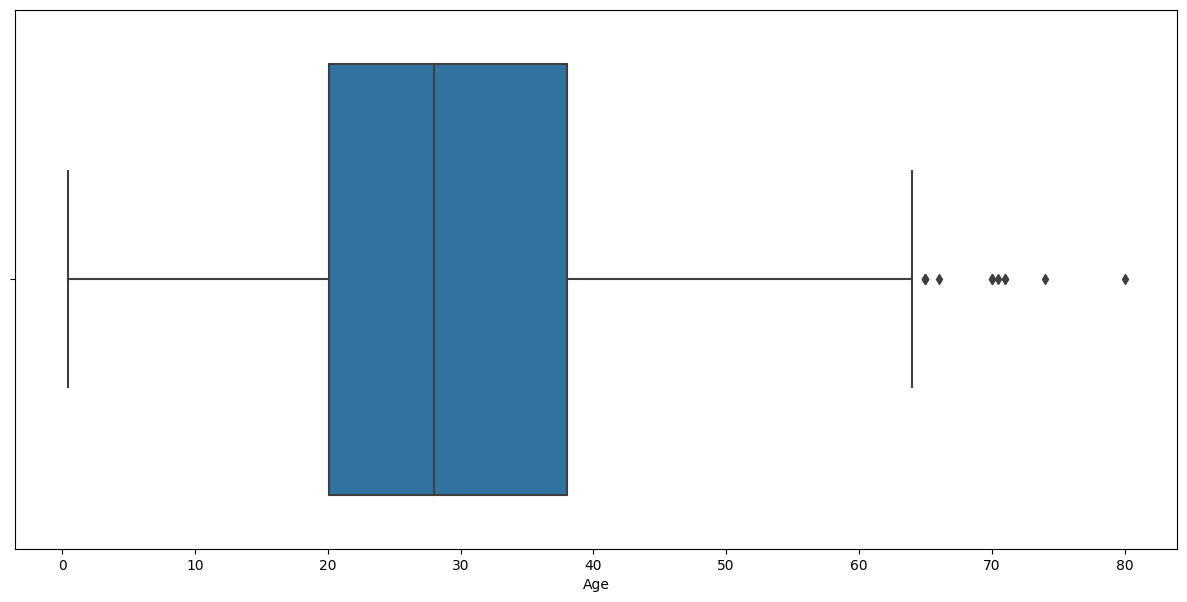

In [1186]:
sns.boxplot(data = ds_work, x = "Age")

Let's calculate the 0.25-percentile (q1) and the 0.75-percentile (q3) to calculate the interquartile range (iqr) and check where the most common values for Age are

In [1187]:
q1_age = np.percentile(ds_work["Age"], [25])
q1_age[0]

nan

In [1188]:
q3_age = np.percentile(ds_work["Age"], [75])
q3_age[0]

nan

In [1189]:
iqr_age = q3_age - q1_age
iqr_age[0]

nan

Even if most common values for Age are between 6 and 35 years, there is nothing wrong with those values above 64.81. Logically, ages greater than 64.81 are possible (Even 80 years). 
In conclussion, it is not neccesary to delete them.

## Outliers for SibSp

Let's first check a histogram for SibSp

<AxesSubplot: xlabel='SibSp', ylabel='Count'>

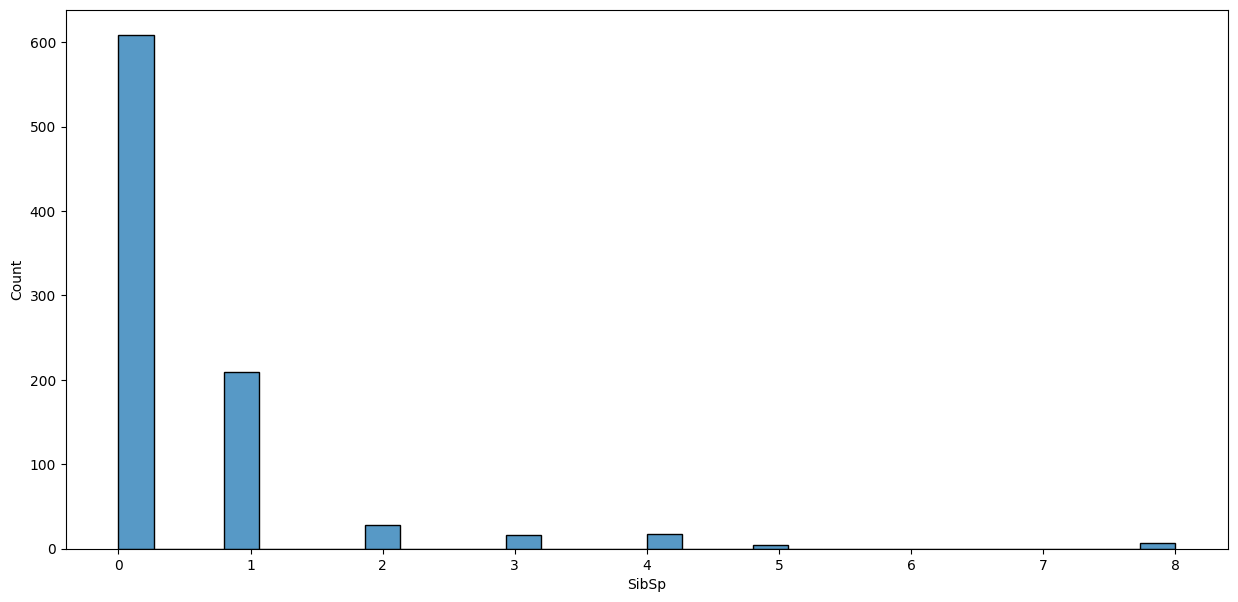

In [1190]:
sns.histplot(data = ds_work, x = "SibSp", bins = 30)

It seems like values greater than or equal to 2 seem less common. Our analysis also told us that Sibsp values greater than 2.50 may be considered outliers. Let's check those values

In [1191]:
ds_work[ds_work["SibSp"] > 2.50].sort_values(by = "SibSp")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0000,3,1,349909,21.0750,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0000,3,1,349909,21.0750,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0000,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0000,3,2,19950,263.0000,C23 C25 C27,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0000,3,2,347088,27.9000,NaN,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0000,3,2,347088,27.9000,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0000,3,0,31027,21.0000,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)",female,33.0000,3,0,3101278,15.8500,NaN,S


Those rows with equal SibSp values, given the passengers have same last name and given they have the same values for Embarked, Fare, Parch, Ticket and Cabin, seem to represent siblings, as the feature "SibSp" gives information about siblings aboard. 

Let's check a boxplot for SibSp for better understanding.

<AxesSubplot: xlabel='SibSp'>

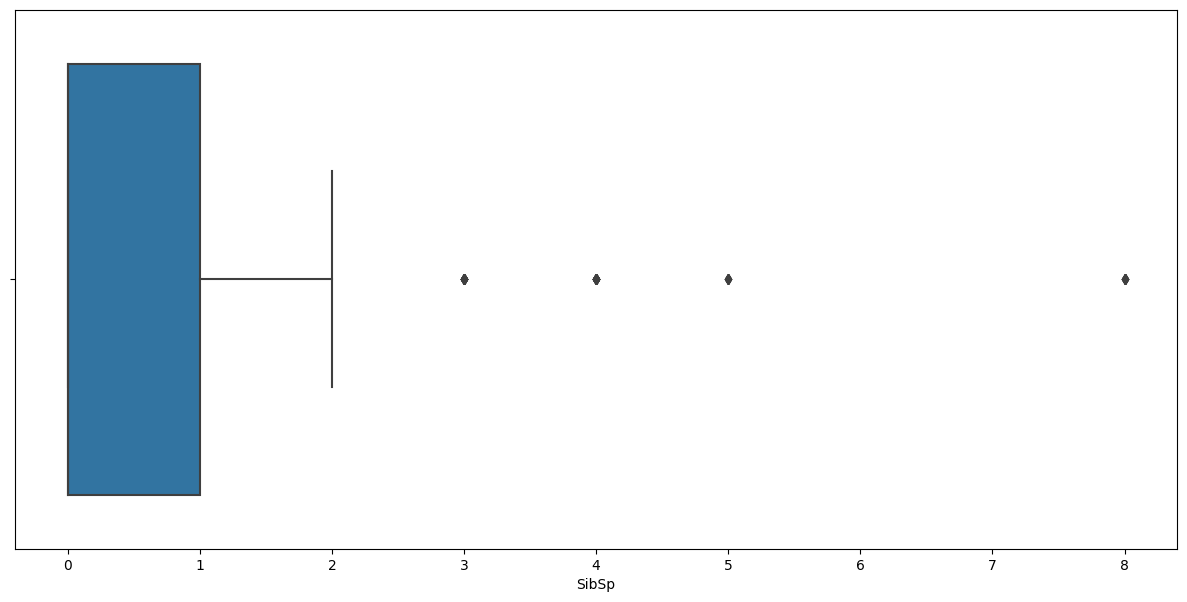

In [1192]:
sns.boxplot(data = ds_work, x = "SibSp")

Since SibSp takes only few values, we can easily conclude that the 0.25-percentile (q1) is 0, the 0.75-percentile (q3) is 1, and the IQR is 1. So, even if an amount of 0 or 1 siblings/spouses were more common, it is logical and it makes sense to have siblings greater than 2 (Even 8 siblings/spouses). In conclussion, it is not neccesary to delete them.

## Outliers for Parch

Let's first check a histogram for SibSp

<AxesSubplot: xlabel='Parch', ylabel='Count'>

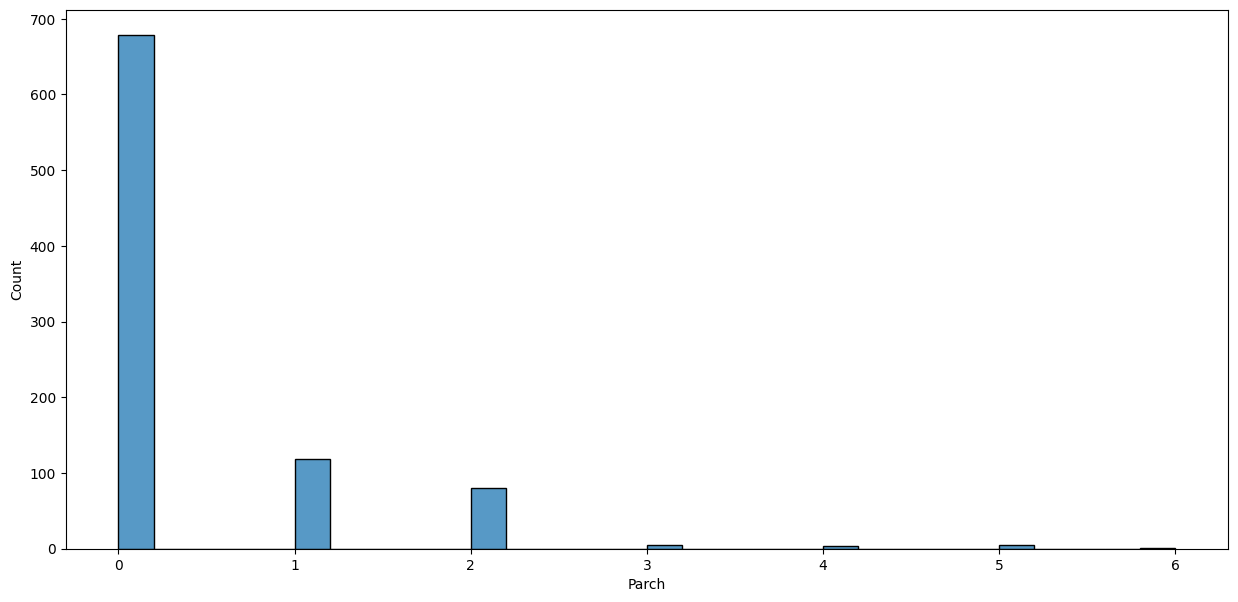

In [1193]:
sns.histplot(data = ds_work, x = "Parch", bins = 30)

Even if our analysis also told us that Parch values greater than 0 may be considered outliers, values greater than or equal to 3 seem less common. Let's check those values

In [1194]:
ds_work[ds_work["Parch"] >= 3].sort_values(by = "Parch")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
86,87,0,3,"Ford, Mr. William Neal",male,16.0000,1,3,W./C. 6608,34.3750,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0000,2,3,29106,18.7500,NaN,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0000,1,3,W./C. 6608,34.3750,NaN,S
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0000,1,3,29105,23.0000,NaN,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0000,0,3,2666,19.2583,NaN,C
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0000,1,4,347088,27.9000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0000,1,4,347088,27.9000,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0000,1,4,19950,263.0000,C23 C25 C27,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0000,0,4,349909,21.0750,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0000,1,5,347082,31.2750,NaN,S


This doesn't give any important relationship.

Let's check a boxplot for Parch for better understanding.

<AxesSubplot: xlabel='Parch'>

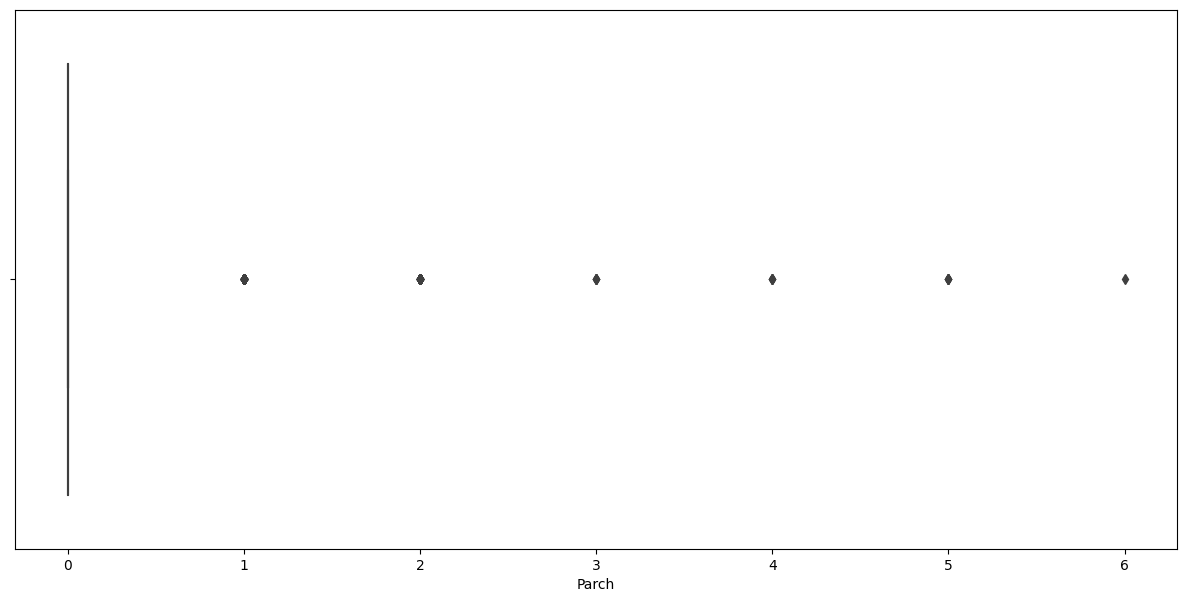

In [1195]:
sns.boxplot(data = ds_work, x = "Parch")

This also doesn't give us valuable information. Even if Parch values greater than 0 are less common, just like with SibSp, it is possible to have more than 0 parents/children.
In conclussion, it is not neccesary to delete these values.

## Outliers for Fare

From the histogram before, we supposed that some values may be outliers. Our analysis also told us that Fare values greater than 65.63 may be considered outliers. Let's check those values

In [1196]:
ds_work[ds_work["Fare"] >= 65.63].sort_values(by = "Fare")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0000,1,0,113776,66.6000,C2,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0000,1,0,113776,66.6000,C2,S
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0000,0,0,PC 17477,69.3000,B35,C
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0000,0,0,PC 17477,69.3000,B35,C
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S


So, people who paid a higher Fare, usually travelled in 1st class (Which makes sense), but we can't get more important info by checking the other features.

Let's check a boxplot for Fare for better understanding.

<AxesSubplot: xlabel='Fare'>

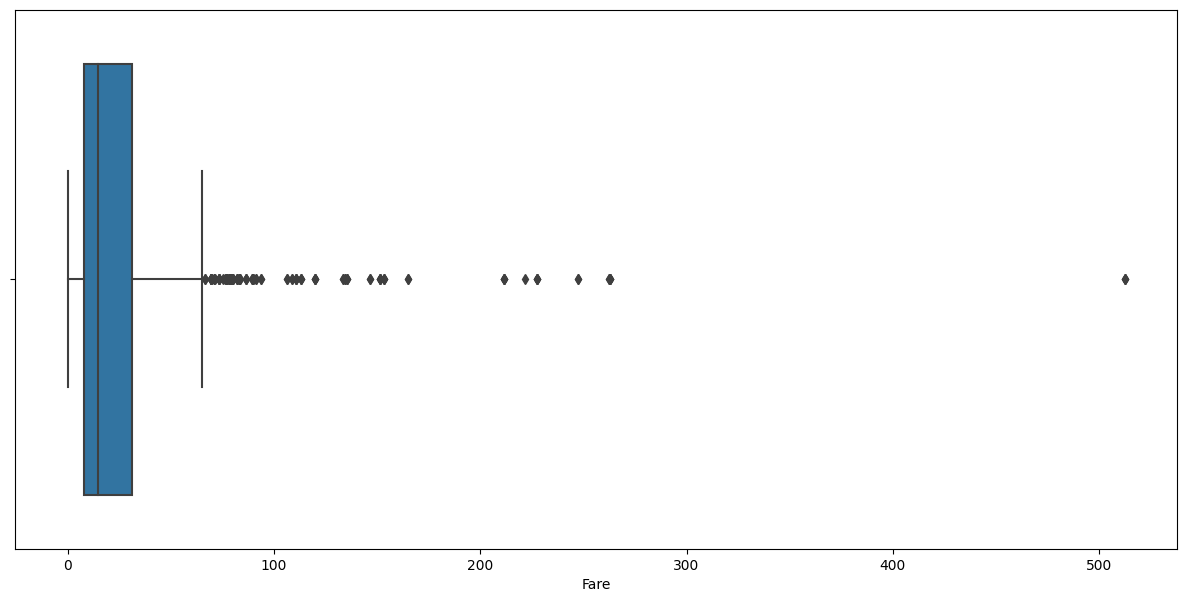

In [1197]:
sns.boxplot(data = ds_work, x = "Fare")

Let's calculate the 0.25-percentile (q1) and the 0.75-percentile (q3) to calculate the interquartile range (iqr) and check where the most common values for Fare are

In [1198]:
q1_fare = np.percentile(ds_work["Fare"], [25])
q1_fare[0]

7.9104

In [1199]:
q3_fare = np.percentile(ds_work["Fare"], [75])
q3_fare[0]

31.0

In [1200]:
iqr_fare = q3_fare - q1_fare
iqr_fare[0]

23.0896

Even if most common values for Fare are between 7.9104 and 31 years, there is nothing wrong with those values above 65.63. Logically, higher Fares are possible. In conclussion, it is not neccesary to delete them.

# Checking correlation between Fare and Pclass

We saw in the heatmap that Fare and Pclass are highly correlated. Let's now check their relation using a scatterplot.

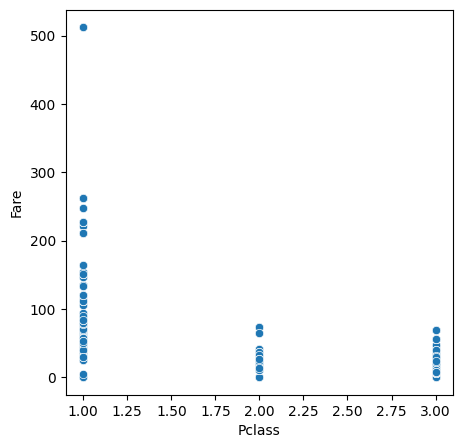

In [1201]:
plt.figure(figsize = (5, 5))
sns.scatterplot(data = ds_work, x = "Pclass" , y = "Fare")
plt.show()

As the heatmap said, they have a negative correlation. The higher the Pclass, the lower the Fare might be, which makes sense in real life.

Given their high correlation, we can delete one of them. We are going to delete the Pclass feature, since the Fare could still give us valuable information.

In [1202]:
ds_work.drop(["Pclass"], axis = 1, inplace = True)

In [1203]:
ds_test.drop(["Pclass"], axis = 1, inplace = True)

# Delete unnecesary features

We found that Ticket doesn't give relevant information about whether a passenger died or not. Even repeated tickets don't give any information about that. So let's delete Ticket from our datasets

In [1204]:
ds_work.drop(["Ticket"], axis = 1, inplace = True)

In [1205]:
ds_test.drop(["Ticket"], axis = 1, inplace = True)

Finally, since Cabin has 77% null values, and it doesn't give information about dead or survived passenger, we delete it

In [1206]:
ds_work.drop(["Cabin"], axis = 1, inplace = True)

In [1207]:
ds_test.drop(["Cabin"], axis = 1, inplace = True)

We check the new shapes of the datasets, they should have 2 less features

In [1208]:
ds_work.shape

(891, 9)

In [1209]:
ds_test.shape

(418, 8)

# Treating null values

## Age null values

Before treating null values in Age, let's make a histogram for it

<AxesSubplot: xlabel='Age', ylabel='Count'>

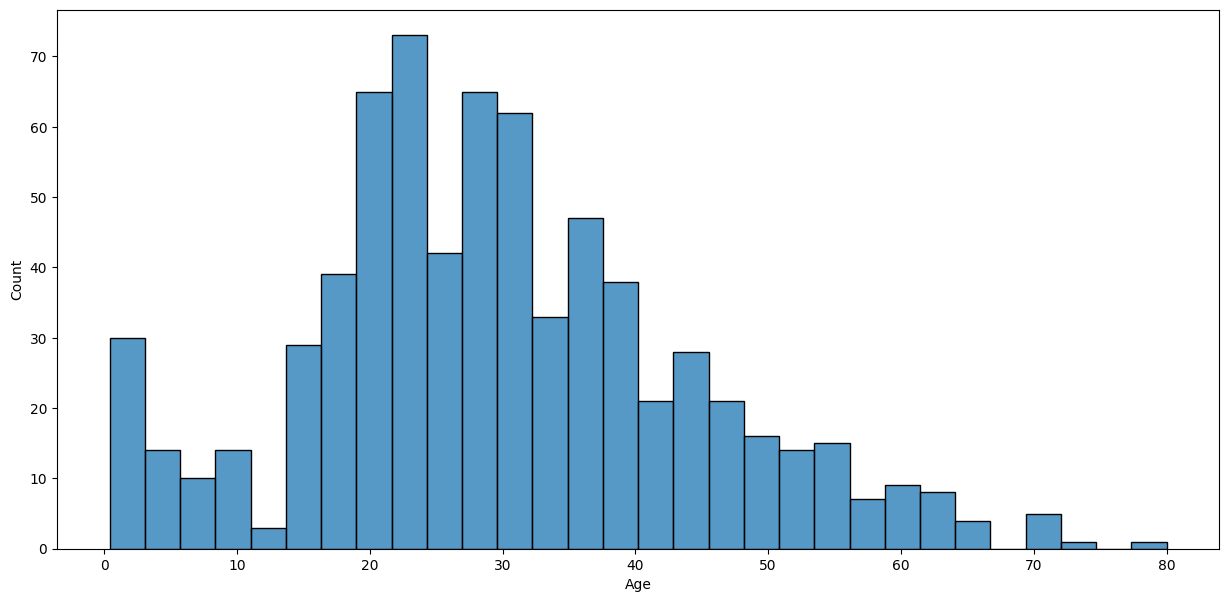

In [1210]:
sns.histplot(data = ds_work, x = "Age", bins = 30)

As an additional comment, it seems like ages around 70 could be outliers, which we are going to analyze later.

Let's take a better look at certain percentiles for Age

In [1211]:
ds_work[["Age"]].describe(percentiles = [0.25, 0.30, 0.40, 0.50, 0.60, 0.7, 0.75])

,Age
count,714.0000
mean,29.6991
std,14.5265
min,0.4200
25%,20.1250
30%,22.0000
40%,25.0000
50%,28.0000
60%,31.8000
70%,36.0000


From the histogram and percentiles we can conclude that most people are or were between 18 and 35 years old

We found that Age had 177 null values (20% of the dataset). Since age seems like a more relevant feature, and we could lose valuable information by droping rows with null values for Age, we can replace those null values with zeroes.

In [1212]:
ds_work["Age"].fillna(0, inplace = True)

In [1213]:
ds_test["Age"].fillna(0, inplace = True)

Now let's check again the histogram for Age

<AxesSubplot: xlabel='Age', ylabel='Count'>

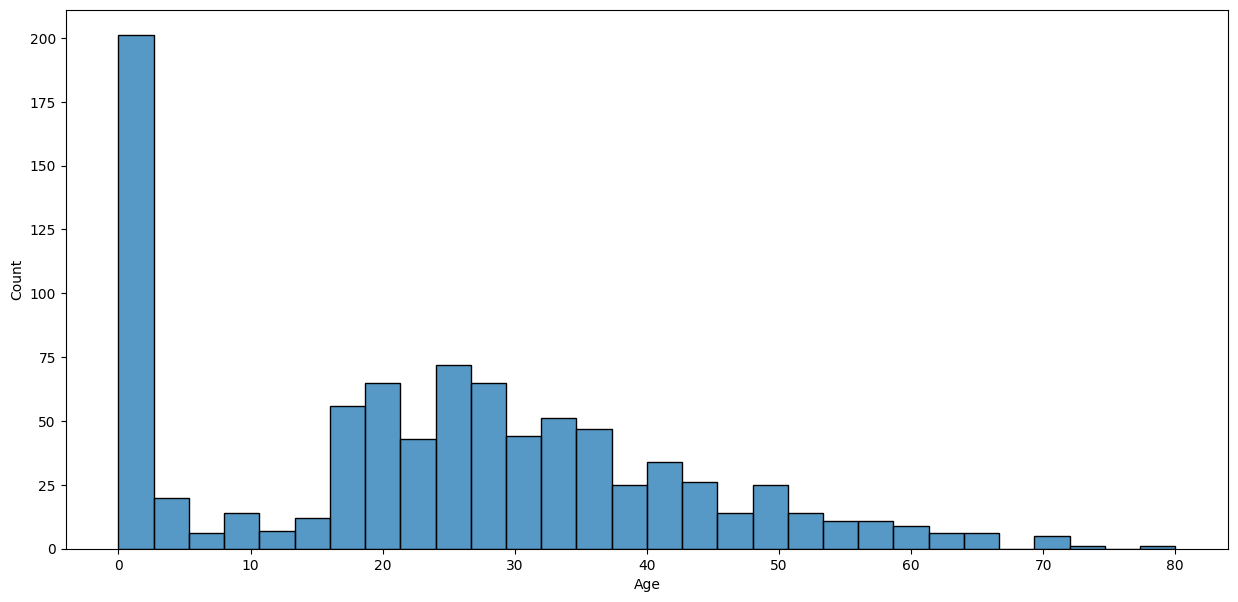

In [1214]:
sns.histplot(data = ds_work, x = "Age", bins = 30)

Now, the graph is skewed. We could solve this later by applying some transformation or normalization.

## Embarked null values

We found that Embarked had 2 null values, We can check those rows with null values for Embarked

In [1215]:
ds_work[ds_work["Embarked"].isnull()]

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0000,0,0,80.0000,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0000,0,0,80.0000,NaN


We could drop these rows since they don't give any valuable information

In [1216]:
ds_work.dropna(inplace = True)

In [1217]:
ds_test.dropna(inplace = True)

Now, we should have no more null values left

In [1218]:
ds_work.isnull().sum()

PassengerId    0
Survived       0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [1219]:
ds_test.isnull().sum()

PassengerId    0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

We check the new shapes of the datasets

In [1220]:
ds_work.shape

(889, 9)

In [1221]:
ds_test.shape

(417, 8)

# Optimizing memory usage

Information about the features, amount of null values, data type of each feature, and others

In [1222]:
ds_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Name         889 non-null    object 
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [1223]:
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Name         417 non-null    object 
 2   Sex          417 non-null    object 
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     417 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 29.3+ KB


Memory usage of each feature

In [1224]:
ds_work.memory_usage()

Index          7112
PassengerId    7112
Survived       7112
Name           7112
Sex            7112
Age            7112
SibSp          7112
Parch          7112
Fare           7112
Embarked       7112
dtype: int64

In [1225]:
ds_test.memory_usage()

Index          3336
PassengerId    3336
Name           3336
Sex            3336
Age            3336
SibSp          3336
Parch          3336
Fare           3336
Embarked       3336
dtype: int64

Now, we change the data type of some features to save memory, but without losing info of the features.

These features have a small range value (PassengerId from 1 to 891; Survived only 0 and 1; SibSp from 0 to 8; Parch from 0 to 6; Fare from 0 to 512.3292; Age from 0 to 80), so we can use a smaller data type for them

In [1226]:
ds_work["PassengerId"] = ds_work["PassengerId"].astype("int16")
ds_work["Survived"] = ds_work["Survived"].astype("int8")
ds_work["SibSp"] = ds_work["SibSp"].astype("int8")
ds_work["Parch"] = ds_work["Parch"].astype("int8")
ds_work["Fare"] = ds_work["Fare"].astype("float16")
ds_work["Age"] = ds_work["Age"].astype("float16")

In [1227]:
ds_test["PassengerId"] = ds_test["PassengerId"].astype("int16")
ds_test["SibSp"] = ds_test["SibSp"].astype("int8")
ds_test["Parch"] = ds_test["Parch"].astype("int8")
ds_test["Fare"] = ds_test["Fare"].astype("float16")
ds_test["Age"] = ds_test["Age"].astype("float16")

These features only take specific values (Sex takes male and female; Embarked takes S, C, Q or nan), so we can reduce them to categorical features

In [1228]:
ds_work["Sex"] = ds_work["Sex"].astype("category")
ds_work["Embarked"] = ds_work["Embarked"].astype("category")

In [1229]:
ds_test["Sex"] = ds_test["Sex"].astype("category")
ds_test["Embarked"] = ds_test["Embarked"].astype("category")

We check again the memory usage of the entire datasets and of each feature

In [1230]:
ds_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int16   
 1   Survived     889 non-null    int8    
 2   Name         889 non-null    object  
 3   Sex          889 non-null    category
 4   Age          889 non-null    float16 
 5   SibSp        889 non-null    int8    
 6   Parch        889 non-null    int8    
 7   Fare         889 non-null    float16 
 8   Embarked     889 non-null    category
dtypes: category(2), float16(2), int16(1), int8(3), object(1)
memory usage: 23.7+ KB


In [1231]:
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  417 non-null    int16   
 1   Name         417 non-null    object  
 2   Sex          417 non-null    category
 3   Age          417 non-null    float16 
 4   SibSp        417 non-null    int8    
 5   Parch        417 non-null    int8    
 6   Fare         417 non-null    float16 
 7   Embarked     417 non-null    category
dtypes: category(2), float16(2), int16(1), int8(2), object(1)
memory usage: 10.8+ KB


In [1232]:
ds_work.memory_usage()

Index          7112
PassengerId    1778
Survived        889
Name           7112
Sex            1013
Age            1778
SibSp           889
Parch           889
Fare           1778
Embarked       1021
dtype: int64

In [1233]:
ds_test.memory_usage()

Index          3336
PassengerId     834
Name           3336
Sex             541
Age             834
SibSp           417
Parch           417
Fare            834
Embarked        549
dtype: int64

Even though the datasets are small, we reduced the memory usage from 69.5 KB to 23.7 KB, and from 29.3 KB to 10.8 KB (About 2/3 of memory)

# Saving dataset

Now let's save our datasets

In [1234]:
ds_work.to_csv(r"C:\Users\Administrador\Documents\IA\Proyectos\Titanic\Datasets\ds_train_processed.csv", encoding = 'latin-1', index = False, header = True, decimal = '.', sep = ',')
ds_test.to_csv(r"C:\Users\Administrador\Documents\IA\Proyectos\Titanic\Datasets\ds_test_processed.csv", encoding = 'latin-1', index = False, header = True, decimal = '.', sep = ',')